In [2]:

import numpy as np
import pandas as pd



In [3]:
raw_data = pd.read_csv("Malware dataset.csv")
raw_data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [4]:
raw_data.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

Based on the characteristics of the observations, the dataset was created in a Unix / Lunix-based
virtual machine for classification purposes, which are harmless with malware software for Android
devices. The data set consists of 100,000 observation data and 35 features. Below is a table of
specifications and descriptions.

| Features Description 	| Properties                                                      	|
|----------------------	|-----------------------------------------------------------------	|
| hash APK/ SHA256     	| file name                                                       	|
| milisecond           	| time                                                            	|
| classification       	| malware/beign                                                   	|
| state                	| flag of unrunable/runnable/stopped tasks                        	|
| usage_counter        	| task structure usage counter                                    	|
| prio                 	| keeps the dynamic priority of a process                         	|
| static_prio          	| static priority of a process                                    	|
| normal_prio          	| priority without taking RT-inheritance into account             	|
| policy               	| planning policy of the process                                  	|
| vm_pgoff             	| the offset of the area in the file, in pages.                   	|
| vm_truncate_count    	| used to mark a vma as now dealt with                            	|
| task_size            	| size of current task.                                           	|
| cached_hole_size     	| size of free address space hole.                                	|
| free_area_cache      	| first address space hole                                        	|
| mm_users             	| address space users                                             	|
| map_count            	| number of memory areas                                          	|
| hiwater_rss          	| peak of resident set size                                       	|
| total_vm             	| total number of pages                                           	|
| shared_vm            	| number of shared pages.                                         	|
| exec_vm              	| number of executable pages.                                     	|
| reserved_vm          	| number of reserved pages.                                       	|
| nr_ptes              	| number of page table entries                                    	|
| end_data             	| end address of code component                                   	|
| last_interval        	| last interval time before thrashing                             	|
| nvcsw                	| number of volunteer context switches.                           	|
| nivcsw               	| number of in-volunteer context switches                         	|
| min_flt              	| minör page faults                                               	|
| maj_flt              	| majör page faults                                               	|
| fs_excl_counter      	| ıt holds file system exclusive resources.                       	|
| lock                 	| the read-write synchronization lock used for file system access 	|
| utime                	| user time                                                       	|
| stime                	| system time                                                     	|
| gtime                	| guest time                                                      	|
| cgtime               	| cumulative group time. Cumulative resource counter              	|
| signal_nvcsw         	| used as cumulative resource counter.                            	|


In [5]:
# read some statistics of the dataset
raw_data.describe(include="all")

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000,100000.000000,100000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
unique,100,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,NaN,malware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,499.500000,NaN,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,NaN,288.676434,NaN,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,NaN,0.000000,NaN,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,NaN,249.750000,NaN,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,NaN,499.500000,NaN,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,NaN,749.250000,NaN,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0


In [6]:
# Check the DataType of our dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

The data is already clean.

In [7]:
#Start Processing
data = raw_data

In [8]:
data["classification"].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

In [9]:
data['classification'] = data.classification.map({'benign':0, 'malware':1})
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [10]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,156a617d84b92c1611e153ebaa1fc2e9d1af9c6154834c...,665,1,0,0,3069538304,15152,0,0,0,...,0,1,120,0,3204448256,384541,5,0,0,0
1,com.qizz.life.apk,104,0,0,0,3069452288,19530,0,0,0,...,0,1,120,0,3204448256,381996,4,0,0,0
2,1117d14765e9169184cc931f7a417a460898e4b0d8f3c8...,990,1,0,0,3069956096,13996,0,0,0,...,0,1,120,0,3204448256,374050,4,0,0,0
3,com.microsoft.amp.apps.bingfinance.apk,145,0,0,0,3069575168,15681,0,0,0,...,0,0,120,1,3204448256,381443,3,0,0,0
4,com.baiwang.instablend.apk,749,0,0,0,3069960192,17027,0,0,0,...,121,1,120,1,3204448256,394800,5,3,0,0


In [11]:
#Import drawing tools

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91952\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


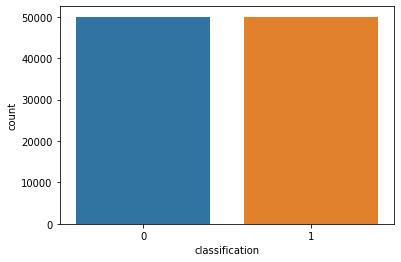

In [11]:
sns.countplot(data["classification"])
plt.show()

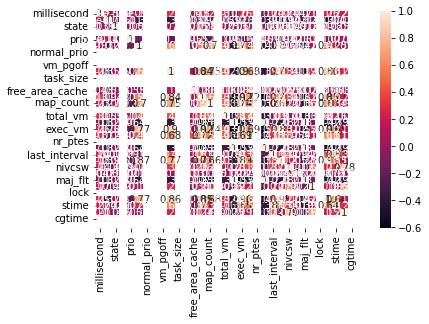

In [12]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
X = data.drop(["hash","classification",'vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = data["classification"]

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

Before we feed to a NN, we need to normalize the data

In [15]:
# Data normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
import tensorflow as tf

In [18]:
#Number of attributes
input_size = 27 

#Number of Outputs
output_size = 2 

# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1400      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 20

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [22]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
                   validation_split=0.2)


Epoch 1/20
640/640 [==============================] - 2s 2ms/step - loss: 0.0788 - accuracy: 0.9701 - val_loss: 0.0094 - val_accuracy: 0.9972
Epoch 2/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.0045 - val_accuracy: 0.9985
Epoch 3/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0021 - val_accuracy: 0.9994
Epoch 4/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 5/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 6/20
640/640 [==============================] - 2s 3ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 7.2070e-04 - val_accuracy: 0.9998
Epoch 7/20
640/640 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 9.6182e-04 - val_accuracy: 0.999

C:\Users\91952\AppData\Local\Temp\ipykernel_11648\1364437480.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
C:\Users\91952\AppData\Local\Temp\ipykernel_11648\1364437480.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')


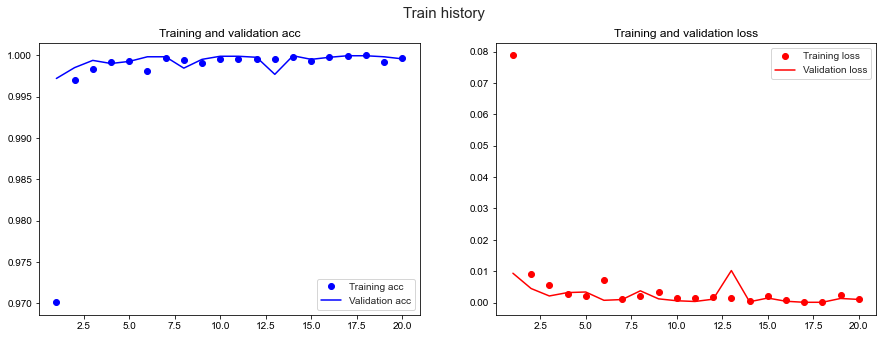

In [23]:
# Visualize the result
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "bo", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 2ms/step - loss: 9.6306e-04 - accuracy: 0.9997

Test loss: 0.000963. Test accuracy: 99.965000%


Further train the model using SGD with lr=0.001

In [39]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

C:\Users\91952\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [26]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=10, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 11/30
640/640 [==============================] - 2s 2ms/step - loss: 2.4710e-04 - accuracy: 0.9999 - val_loss: 5.5403e-04 - val_accuracy: 0.9998
Epoch 12/30
640/640 [==============================] - 1s 2ms/step - loss: 1.5336e-04 - accuracy: 1.0000 - val_loss: 4.3927e-04 - val_accuracy: 0.9999
Epoch 13/30
640/640 [==============================] - 1s 2ms/step - loss: 1.2315e-04 - accuracy: 1.0000 - val_loss: 3.4377e-04 - val_accuracy: 0.9999
Epoch 14/30
640/640 [==============================] - 1s 2ms/step - loss: 9.9883e-05 - accuracy: 1.0000 - val_loss: 2.8765e-04 - val_accuracy: 0.9999
Epoch 15/30
640/640 [==============================] - 1s 2ms/step - loss: 8.5285e-05 - accuracy: 1.0000 - val_loss: 2.5862e-04 - val_accuracy: 0.9999
Epoch 16/30
640/640 [==============================] - 1s 2ms/step - loss: 7.3869e-05 - accuracy: 1.0000 - val_loss: 2.3345e-04 - val_accuracy: 0.9999
Epoch 17/30
640/640 [==============================] - 1s 2ms/step - loss: 6.8336e-05 - accura

In [27]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 2ms/step - loss: 5.6052e-04 - accuracy: 0.9998

Test loss: 0.000561. Test accuracy: 99.980003%


In [28]:
model.save('trained_model.h5')

In [ ]:
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("trained_model.h5")

def browse_file():
    filename = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if filename:
        # Perform prediction on the selected file
        predict_malware(filename)

def predict_malware(filename):
    # Read the CSV file
    data = pd.read_csv(filename)

    # Preprocess the data
    data['classification'] = data.classification.map({'benign': 0, 'malware': 1})
    X = data.drop(["hash", "classification", 'vm_truncate_count', 'shared_vm', 'exec_vm', 'nvcsw', 'maj_flt', 'utime'], axis=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Perform prediction using the trained model
    predictions = model.predict(X)

    # Identify rows containing malware
    malware_rows = [i for i, prediction in enumerate(predictions) if prediction[0]<0.5]

    if malware_rows:
        # Remove rows containing malware
        data = data.drop(malware_rows)

        # Save the cleaned CSV file
        cleaned_filename = filename.split(".csv")[0] + "_cleaned.csv"
        data.to_csv(cleaned_filename, index=False)
        message_label.config(text=f"The file has been classified as consisting of malware and cleaned.\nCleaned data is saved as {cleaned_filename}.", fg="green")
    else:
        message_label.config(text="The file is classified as Benign (No Malware)", fg="blue")

# Create the Tkinter root window
root = tk.Tk()
root.title("Malware Classification")
root.configure(bg="white")  # Set background color

# Create a label for the title
title_label = tk.Label(root, text="Malware and Benign class Classification.", font=("Arial", 16, "bold"), bg="white")
title_label.pack(pady=20)

# Create a label for displaying messages
message_label = tk.Label(root, text="", font=("Arial", 12), bg="white")
message_label.pack()

# Create a button to trigger file selection
upload_button = tk.Button(root, text="Upload File for classification", font=("Arial", 12, "bold"), bg="lightblue", fg="white", padx=10, pady=5, command=browse_file)
upload_button.pack(pady=20)

# Start the Tkinter event loop
root.mainloop()
